In [1]:
import pandas as pd
from libs.parser import *

import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter





In [2]:
dataset_thread_1_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/trial_thread_1_taskset"
golfball_thread_1_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/trial_thread_1_taskset_golfball"
dataset_thread_32_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/trial_thread_32_taskset"
golfball_thread_32_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/trial_thread_32_taskset_golfball"

dir_list = [
    dataset_thread_1_dir,
    golfball_thread_1_dir,
    dataset_thread_32_dir,
    golfball_thread_32_dir
]

In [3]:

data_all = {}
for trial_dir in dir_list:
    data_trial = []  
    exp_name = trial_dir.split('/')[-1]
    print(f"processing the dir {exp_name}")
    for fname in os.listdir(trial_dir):
        
        
        if "Pardiso" in fname:
            solver = "Eigen::PardisoLDLT"
        elif "AMGCL" in fname:
            solver = "AMGCL"
        elif "Hypre" in fname:
            solver = "Hypre"

        log_path = os.path.join(trial_dir, fname)
        data = parse_log_file(log_path, solver)
        data_trial.extend(data)
    data_all[exp_name] = data_trial


processing the dir trial_thread_1_taskset


processing the dir trial_thread_1_taskset_golfball
processing the dir trial_thread_32_taskset


processing the dir trial_thread_32_taskset_golfball


In [4]:
import pickle

with open('/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/12_3_read_data.pkl', 'wb') as f:
    pickle.dump(data_all, f)


In [6]:
for exp_name, exp_data in data_all.items():
    print(f"Experiment: {exp_name}, Number of runs: {len(exp_data)}")

Experiment: trial_thread_1_taskset, Number of runs: 107179
Experiment: trial_thread_1_taskset_golfball, Number of runs: 4115
Experiment: trial_thread_32_taskset, Number of runs: 107179
Experiment: trial_thread_32_taskset_golfball, Number of runs: 4119


In [8]:
grouped_data = []
for exp_name, exp_data in data_all.items():
    num_thread = int(exp_name.split("_")[2])
    for entry in exp_data:
        solver = entry["solver"]
        mat_sz = entry["mat_sz"]
        clock_time = entry["clock_time"]

        # Create label based on solver and tolerance
        if solver == "Eigen::PardisoLDLT":
            solver_name = "Pardiso"
        else:
            solver_name = solver

        this_data = {
            "solver_name": solver_name,
            "mat_sz": mat_sz,
            "clock_time": clock_time,
            "num_thread": num_thread
        }
        grouped_data.append(this_data)
    

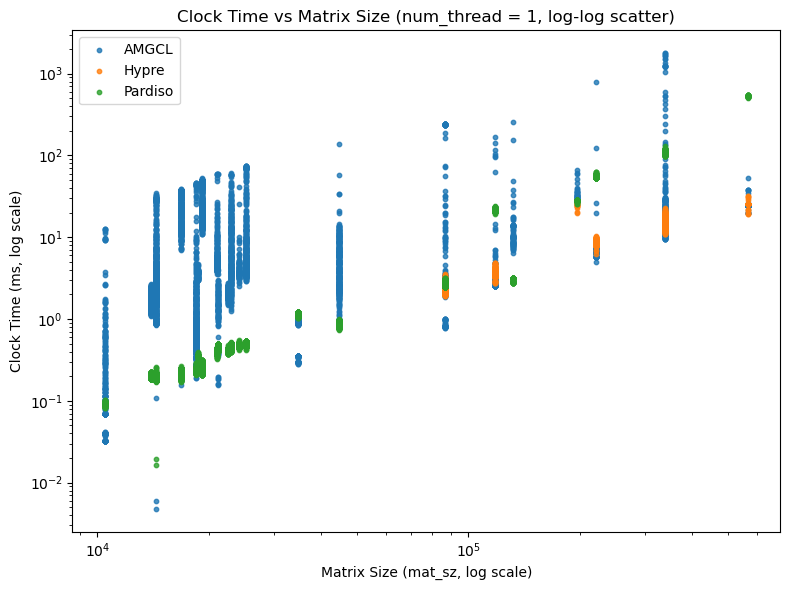

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(grouped_data)

# Filter num_thread = 1
df1 = df[df["num_thread"] == 1]
df1 = df1[df1["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))

# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"],
        sdf["clock_time"],
        s=10,                # point size
        alpha=0.8,           # transparency
        label=solver
    )

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("Clock Time (ms, log scale)")
plt.title("Clock Time vs Matrix Size (num_thread = 1, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


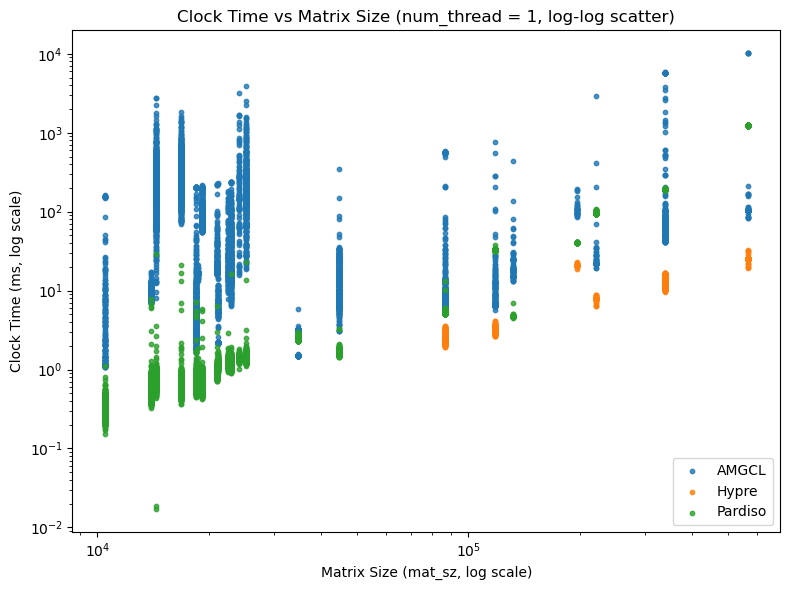

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(grouped_data)

# Filter num_thread = 1
df1 = df[df["num_thread"] == 32]
df1 = df1[df1["mat_sz"]>=1e4]


plt.figure(figsize=(8, 6))

# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"],
        sdf["clock_time"],
        s=10,                # point size
        alpha=0.8,           # transparency
        label=solver
    )

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("Clock Time (ms, log scale)")
plt.title("Clock Time vs Matrix Size (num_thread = 1, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


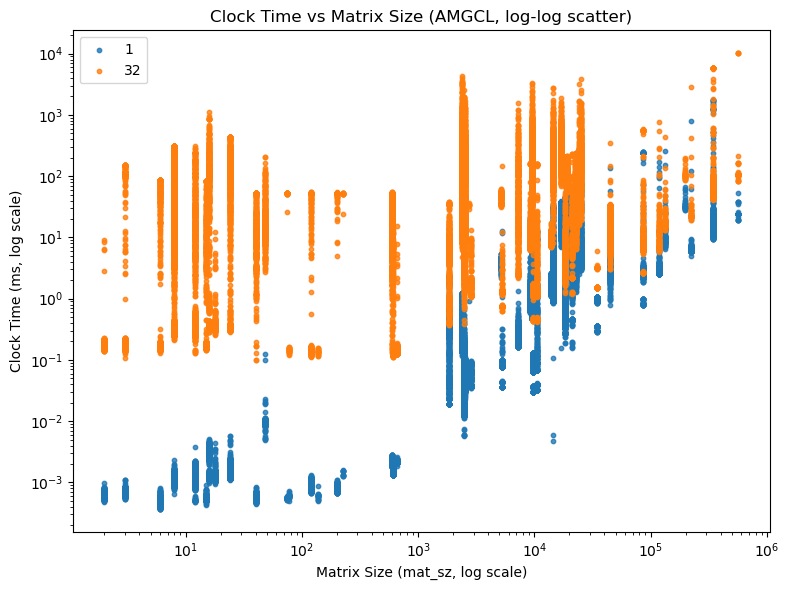

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(grouped_data)

current_solver = "AMGCL"
df1 = df[df["solver_name"] == current_solver]
# df1 = df1[df1["mat_sz"]>=1e4]


plt.figure(figsize=(8, 6))

# Scatter for each solver
for solver, sdf in df1.groupby("num_thread"):
    plt.scatter(
        sdf["mat_sz"],
        sdf["clock_time"],
        s=10,                # point size
        alpha=0.8,           # transparency
        label=solver
    )

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("Clock Time (ms, log scale)")
plt.title(f"Clock Time vs Matrix Size ({current_solver}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


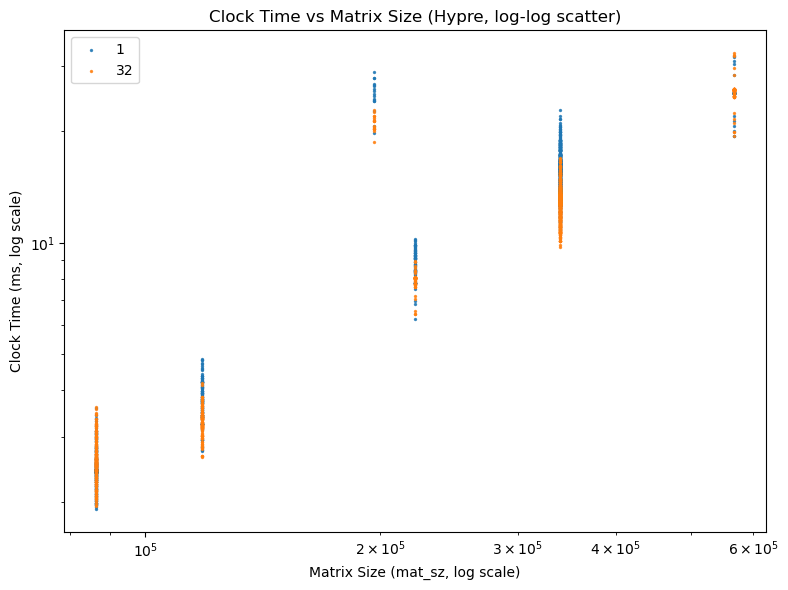

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(grouped_data)

current_solver = "Hypre"
df1 = df[df["solver_name"] == current_solver]
df1 = df1[df1["mat_sz"]>=1e4]


plt.figure(figsize=(8, 6))

# Scatter for each solver
for solver, sdf in df1.groupby("num_thread"):
    plt.scatter(
        sdf["mat_sz"],
        sdf["clock_time"],
        s=2,                # point size
        alpha=0.8,           # transparency
        label=solver
    )

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("Clock Time (ms, log scale)")
plt.title(f"Clock Time vs Matrix Size ({current_solver}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


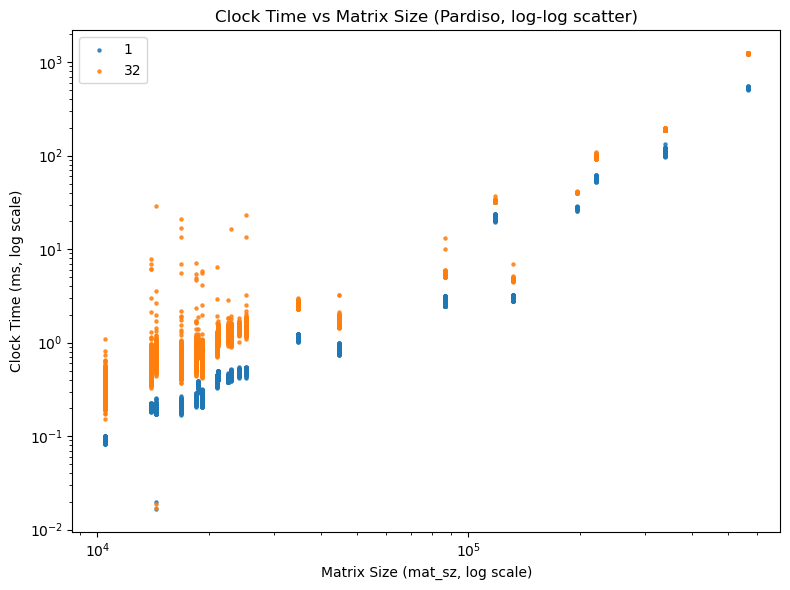

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(grouped_data)

current_solver = "Pardiso"
df1 = df[df["solver_name"] == current_solver]
df1 = df1[df1["mat_sz"]>=1e4]


plt.figure(figsize=(8, 6))

# Scatter for each solver
for solver, sdf in df1.groupby("num_thread"):
    plt.scatter(
        sdf["mat_sz"],
        sdf["clock_time"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("Clock Time (ms, log scale)")
plt.title(f"Clock Time vs Matrix Size ({current_solver}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
